# MNIST Digits Classification Using Deep Learning (Neural Network)

## Importing Dependencies

In [2]:
import numpy as np  # Import numpy library for numerical computing
import pandas as pd # pandas for creating dataframe
import matplotlib.pyplot as plt  # Import matplotlib library for data visualization
import seaborn as sns  # Import seaborn library for enhanced data visualization
from PIL import Image  # Import PIL library for image manipulation
import cv2  # Import OpenCV library for computer vision tasks
import tensorflow as tf  # Import TensorFlow library for deep learning
from tensorflow import keras  # Import Keras, a high-level API for TensorFlow
from keras.datasets import mnist  # Import MNIST dataset from Keras
from tensorflow.math import confusion_matrix  # Import confusion_matrix function from TensorFlow math module
tf.random.set_seed(5)  # Set random seed for reproducibility of random operations
import random  # Import random module for additional random operations


## Loading the MNIST dataset from keras.datasets

In [3]:
# loading the dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
# print the type of data
print(f"X_train type - {type(X_train)}")
print(f"Y_train type - {type(Y_train)}")
print(f"X_test type - {type(X_test)}")
print(f"Y_test type - {type(Y_test)}")

X_train type - <class 'numpy.ndarray'>
Y_train type - <class 'numpy.ndarray'>
X_test type - <class 'numpy.ndarray'>
Y_test type - <class 'numpy.ndarray'>


In [5]:
# print the shape of the numpy arrays
print(f"X_train shape - {X_train.shape}")
print(f"Y_train shape - {Y_train.shape}")
print(f"X_test shape - {X_test.shape}")
print(f"Y_test shape - {Y_test.shape}")

X_train shape - (60000, 28, 28)
Y_train shape - (60000,)
X_test shape - (10000, 28, 28)
Y_test shape - (10000,)


Training data --> 60,000 Images

Testing data --> 10,000 Images

Image dimension --> 28 x 28

Grayscale Image --> 1 channel

In [6]:
# checking the feature numpy array
print(X_train[5][20])

[  0   0   0   0   0 231 252 245 205 216 252 252 252 124   3   0   0   0
   0   0   0   0   0   0   0   0   0   0]


## Displaying Some random feature images with their corresponding output

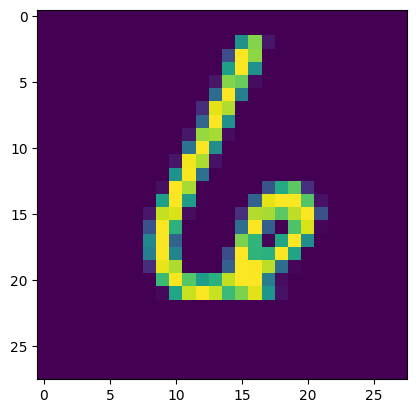

Output : 6


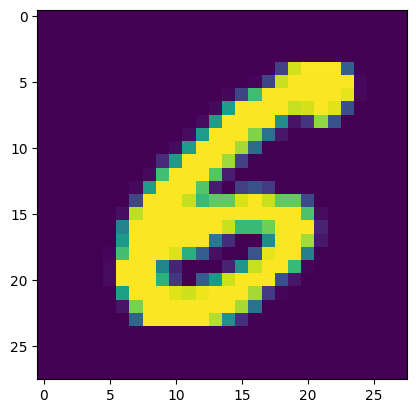

Output : 6


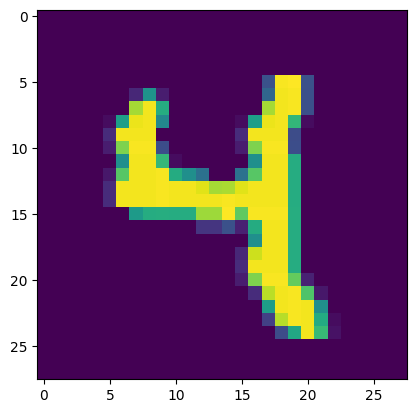

Output : 4


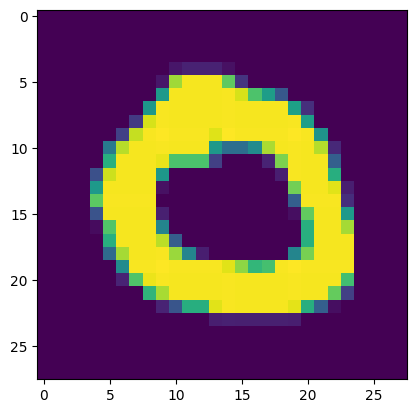

Output : 0


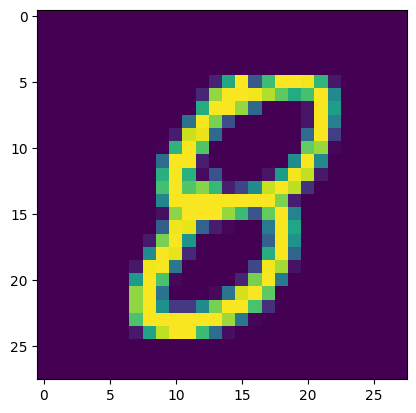

Output : 8


In [7]:
# displaying 5 random images from X_train with their corresponding outputs from Y_train
for i in range(5):
    num = random.randint(1, 60000)
    plt.imshow(X_train[num])
    plt.show()
    print(f"Output : {Y_train[num]}")

In [8]:
# Printing the unique values of our target
print(f"Target (Training data): {np.unique(Y_train)}")
print(f"Target (Testing data): {np.unique(Y_test)}")

Target (Training data): [0 1 2 3 4 5 6 7 8 9]
Target (Testing data): [0 1 2 3 4 5 6 7 8 9]


In [9]:
# scaling down the feature images
X_train = X_train/255
X_test = X_test/255

In [10]:
# checking if the features have been scaled down
print(X_train[5][20])

[0.         0.         0.         0.         0.         0.90588235
 0.98823529 0.96078431 0.80392157 0.84705882 0.98823529 0.98823529
 0.98823529 0.48627451 0.01176471 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


## Building The Neural Network

In [11]:
# settting up the layers of the neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

In [12]:
# Compiling the neural network
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [13]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 889us/step - loss: 0.2995 - accuracy: 0.9140
Epoch 2/10
1875/1875 [==============================] - 2s 872us/step - loss: 0.1412 - accuracy: 0.9577
Epoch 3/10
1875/1875 [==============================] - 2s 880us/step - loss: 0.1065 - accuracy: 0.9673
Epoch 4/10
1875/1875 [==============================] - 2s 886us/step - loss: 0.0868 - accuracy: 0.9734
Epoch 5/10
1875/1875 [==============================] - 2s 879us/step - loss: 0.0706 - accuracy: 0.9783
Epoch 6/10
1875/1875 [==============================] - 2s 858us/step - loss: 0.0612 - accuracy: 0.9809
Epoch 7/10
1875/1875 [==============================] - 2s 825us/step - loss: 0.0528 - accuracy: 0.9826
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0474 - accuracy: 0.9847
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0418 - accuracy: 0.9861
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step

## Evaluating the model

In [14]:
## Evaluating model with test data
model.evaluate(X_test, Y_test)

313/313 [==============================] - 0s 748us/step - loss: 0.1122 - accuracy: 0.9704


[0.11224421113729477, 0.9703999757766724]

Training data accuracy --> 98.83%

Testing data accuracy --> 97.46%

313/313 [==============================] - 0s 630us/step


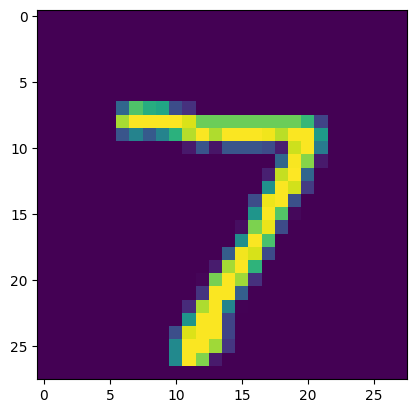

[1.5983052e-04 1.8208031e-05 1.2393646e-01 9.9389583e-01 6.5571601e-07
 1.2073074e-02 3.3171483e-09 9.9999577e-01 9.6612750e-03 6.0259515e-01]


In [15]:
# model.predict() gives the prediction probability of each class for that data point
Y_pred = model.predict(X_test)
plt.imshow(X_test[0])
plt.show()
print(Y_pred[0])

In [16]:
# converting the prediction probabilities to class labels
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [18]:
# making a pandas dataframe to display the comparison between the actual and predicted digit
comparison = pd.DataFrame()
comparison["Actual Digit"] = Y_test
comparison["Predicted Digit"] = np.argmax(Y_pred, axis=1)

In [19]:
# displaying 10 random rows of the comparison dataframe
comparison.sample(10)

,Actual Digit,Predicted Digit
2878,1,1
3771,8,8
2121,8,8
9182,3,3
8049,5,5
5309,3,3
5928,6,6
9468,3,3
3665,6,6
2241,5,5
